In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geospatial-learn-course-data/japan-prefecture-population.csv
/kaggle/input/geospatial-learn-course-data/CA_county_high_earners.csv
/kaggle/input/geospatial-learn-course-data/Philippines_AL258.kml
/kaggle/input/geospatial-learn-course-data/earthquakes1970-2014.csv
/kaggle/input/geospatial-learn-course-data/CA_county_population.csv
/kaggle/input/geospatial-learn-course-data/CA_county_median_age.csv
/kaggle/input/geospatial-learn-course-data/purple_martin.csv
/kaggle/input/geospatial-learn-course-data/top_universities.csv
/kaggle/input/geospatial-learn-course-data/starbucks_locations.csv
/kaggle/input/geospatial-learn-course-data/Police_Districts/Police_Districts/Police_Districts.shp
/kaggle/input/geospatial-learn-course-data/Police_Districts/Police_Districts/Police_Districts.prj
/kaggle/input/geospatial-learn-course-data/Police_Districts/Police_Districts/Police_Districts.dbf
/kaggle/input/geospatial-learn-course-data/Police_Districts/Police_Districts/Police_Districts.cpg
/k

In [57]:
import geopandas as gpd

In [58]:
# Read in the data
full_data = gpd.read_file("../input/geospatial-learn-course-data/DEC_lands/DEC_lands/DEC_lands.shp")#shapefile

In [59]:
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [60]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [61]:
data=full_data.loc[:,["CLASS","COUNTY","geometry"]].copy()

In [62]:
data 

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."
...,...,...,...
2978,None,ST. LAWRENCE,"POLYGON ((476797.577 4963760.373, 476813.252 4..."
2979,None,ST. LAWRENCE,"POLYGON ((474212.474 4961236.101, 474189.987 4..."
2980,None,SENECA,"POLYGON ((340844.385 4757499.092, 341048.855 4..."
2981,None,SCHOHARIE,"POLYGON ((553048.551 4715991.593, 553061.611 4..."


In [63]:
data.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [64]:
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST','WILDERNESS'])].copy()

In [65]:
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


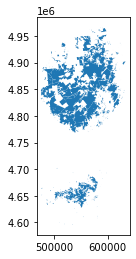

In [66]:
wild_lands.plot()

In [67]:
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

In [68]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("../input/geospatial-learn-course-data/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("../input/geospatial-learn-course-data/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("../input/geospatial-learn-course-data/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")


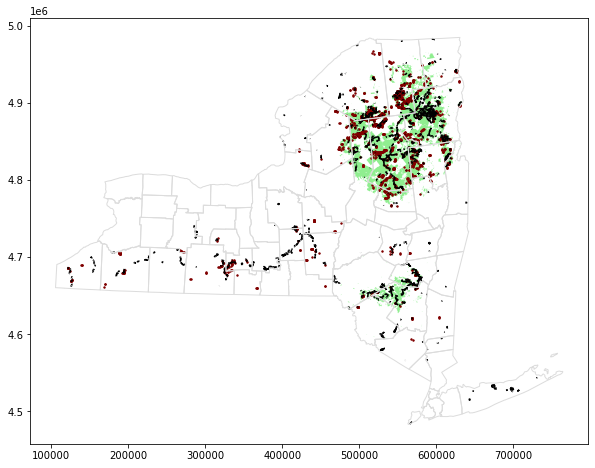

In [69]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

In [70]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')

In [71]:
world = gpd.read_file(world_filepath)

In [72]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


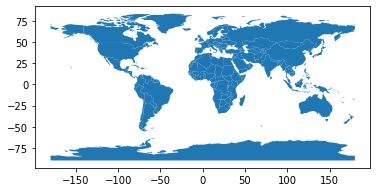

In [73]:
world.plot()

In [74]:
print(wild_lands.crs)

{'init': 'epsg:26918'}


CRS 

In [75]:
# loding a GEODATAFRAME containing regions of ghana

In [76]:
regions = gpd.read_file("../input/geospatial-learn-course-data/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp")

In [77]:
print(regions.crs)

{'init': 'epsg:32630'}


In [78]:
#creating a geodataFrame with health Facilities in Ghana

facilities_df = pd.read_csv("../input/geospatial-learn-course-data/ghana/ghana/health_facilities.csv")

In [79]:
facilities_df.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


In [80]:
#coverting the DataFrame to a GeoDataFrame




In [81]:
facilities = gpd.GeoDataFrame(facilities_df, geometry = gpd.points_from_xy(facilities_df.Longitude , facilities_df.Latitude))

In [82]:
#setting the coordinate reference system (CRS) to EPSG 4326

#when creating a GeoDataFrame from a CSV file , we have to set the CRS -- EPSG 4326 corresponds to latitude and longitude

facilities.crs = {'init':'epsg:4326'}

facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


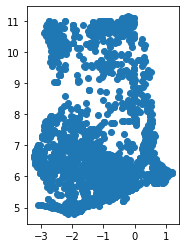

In [83]:
facilities.plot()

In [84]:
#Re-Projecting 
# the process of changing CRS
#When plotting multiple GeoDataFrames, it's important that they all use the same CRS. In the code cell below, we change the CRS of the facilities GeoDataFrame to match the CRS of regions before plotting it.


/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


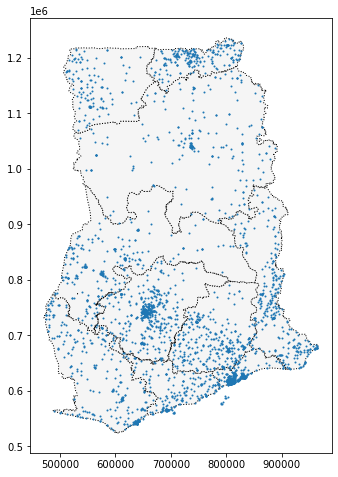

In [85]:
ax = regions.plot(figsize = (8,8) , color = 'whitesmoke' , linestyle=':' , edgecolor = 'black')
facilities.to_crs(epsg = 32630).plot(markersize = 1 , ax=ax)

In [86]:
facilities.to_crs(epsg = 32630).head()

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)


In case the EPSG code is not available in GeoPandas, we can change the CRS with what's known as the "proj4 string" of the CRS. For instance, the proj4 string to convert to latitude/longitude coordinates is as follows:

+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs



In [87]:
#changing the CRS to EPSG 4326 
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."


In [88]:
facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


In [89]:
regions.head()

,Region,geometry
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84..."
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96..."
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69..."
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79..."
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67..."


a Point for the epicenter of an earthquake,
a LineString for a street, or
a Polygon to show country boundaries.

In [90]:
facilities.geometry.x.head() # x point

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

In [91]:
# we can get the Length of a LineString from the length attribute 
#we can get the area of a polygon From the area attribute

In [92]:
# Calculating the area (in square meters) of each polygon in the GeoDataFrame 
regions.loc[:, "AREA"] = regions.geometry.area / 10**6

print("Area of Ghana: {} square kilometers".format(regions.AREA.sum()))
print("CRS:", regions.crs)
regions.head()


Area of Ghana: 239584.5760055668 square kilometers
CRS: {'init': 'epsg:32630'}


,Region,geometry,AREA
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145


In [93]:
regions.geometry.area.sum()

239584576005.56686

In [94]:
regions.geometry.length

0    1.368587e+06
1    1.869886e+06
2    8.546503e+05
3    8.383265e+05
4    4.287189e+05
5    1.968600e+06
6    6.670129e+05
7    6.938928e+05
8    1.299328e+06
9    1.149612e+06
dtype: float64

In [95]:
import folium
from folium import Choropleth , Circle , Marker
from folium.plugins import HeatMap , MarkerCluster

In [96]:
m_1 = folium.Map(location=[42.32,-71.0589] , tiles = 'openstreetmap' , zoom_start = 10)
m_1

In [97]:
m_2 = folium.Map(location = [13.6288 , 79.4192] , tiles='openstreetmap' , zoom_start = 10)
m_2
#https://github.com/python-visualization/folium/tree/master/folium/templates/tiles
#for more stylings

In [98]:
# Load the data
crimes = pd.read_csv("../input/geospatial-learn-course-data/crimes-in-boston/crimes-in-boston/crime.csv", encoding='latin-1')

# Drop rows with missing locations
crimes.dropna(subset=['Lat', 'Long', 'DISTRICT'], inplace=True)

# Focus on major crimes in 2018
crimes = crimes[crimes.OFFENSE_CODE_GROUP.isin([
    'Larceny', 'Auto Theft', 'Robbery', 'Larceny From Motor Vehicle', 'Residential Burglary',
    'Simple Assault', 'Harassment', 'Ballistics', 'Aggravated Assault', 'Other Burglary', 
    'Arson', 'Commercial Burglary', 'HOME INVASION', 'Homicide', 'Criminal Harassment', 
    'Manslaughter'])]
crimes = crimes[crimes.YEAR>=2018]
# Print the first five rows of the table
crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
19,I182070915,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181,NaN,2018-09-02 18:00:00,2018,9,Sunday,18,Part One,SHIRLEY ST,42.325695,-71.068168,"(42.32569490, -71.06816778)"
24,I182070908,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911,NaN,2018-09-03 18:38:00,2018,9,Monday,18,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200006,I162071070,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,281,NaN,2018-02-13 01:17:00,2018,2,Tuesday,1,Part One,GREENVILLE ST,42.326968,-71.080519,"(42.32696802, -71.08051941)"
215588,I162054268,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D4,627,NaN,2018-07-27 17:50:00,2018,7,Friday,17,Part One,BOYLSTON ST,42.344423,-71.098331,"(42.34442266, -71.09833083)"
318679,I152049494,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,C6,196,NaN,2018-03-12 11:00:00,2018,3,Monday,11,Part One,OLD COLONY AVE,42.335811,-71.055754,"(42.33581104, -71.05575441)"
318867,I142025834-00,335,Robbery,ROBBERY - UNARMED - CHAIN STORE,D4,147,NaN,2018-07-17 01:00:00,2018,7,Tuesday,1,Part One,COLUMBUS AVE,42.340872,-71.081458,"(42.34087158, -71.08145768)"


In [99]:
#reducing the ammount of data
daytime_robberies = crimes[((crimes.OFFENSE_CODE_GROUP == 'Robbery') & \
                            (crimes.HOUR.isin(range(9,18))))]

daytime_robberies

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
299,I182070598,311,Robbery,ROBBERY - COMMERCIAL,A15,60,NaN,2018-09-02 17:15:00,2018,9,Sunday,17,Part One,RUTHERFORD AVE,42.371673,-71.063264,"(42.37167264, -71.06326413)"
527,I182070342,381,Robbery,ROBBERY - CAR JACKING,E18,490,NaN,2018-09-01 17:05:00,2018,9,Saturday,17,Part One,CUMMINS HWY,42.276453,-71.112980,"(42.27645319, -71.11297971)"
562,I182070309,361,Robbery,ROBBERY - OTHER,D4,151,NaN,2018-09-01 15:00:00,2018,9,Saturday,15,Part One,BERKELEY ST,42.346055,-71.070507,"(42.34605510, -71.07050669)"
1127,I182069693,301,Robbery,ROBBERY - STREET,A1,74,NaN,2018-08-30 15:24:00,2018,8,Thursday,15,Part One,BULFINCH PL,42.362191,-71.062238,"(42.36219081, -71.06223802)"
1135,I182069687,301,Robbery,ROBBERY - STREET,B2,278,NaN,2018-08-28 12:00:00,2018,8,Tuesday,12,Part One,HARRISON AVE,42.331538,-71.080157,"(42.33153805, -71.08015661)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66122,I182000161,311,Robbery,ROBBERY - COMMERCIAL,E13,307,NaN,2018-01-01 14:59:00,2018,1,Monday,14,Part One,WASHINGTON ST,42.315846,-71.098248,"(42.31584636, -71.09824825)"
104826,I172066565,301,Robbery,ROBBERY - STREET,A1,102,NaN,2018-03-30 10:00:00,2018,3,Friday,10,Part One,TREMONT ST,42.356585,-71.061895,"(42.35658500, -71.06189505)"
174627,I162098332,361,Robbery,ROBBERY - OTHER,E13,572,NaN,2018-01-15 17:15:00,2018,1,Monday,17,Part One,IFFLEY RD,42.312366,-71.099337,"(42.31236627, -71.09933740)"
174629,I162098332,301,Robbery,ROBBERY - STREET,E13,572,NaN,2018-01-15 17:15:00,2018,1,Monday,17,Part One,IFFLEY RD,42.312366,-71.099337,"(42.31236627, -71.09933740)"


CREATING A MARKER CLUSTER MAP

In [100]:
#creating map
m_2 = folium.Map(location=[42.32,-71.0589] , tiles='cartodbpositron' ,zoom_start=13)

#adding points using folium.Marker()

for i,row in daytime_robberies.iterrows():
    Marker([row['Lat'],row['Long']]).add_to(m_2)
    
m_2    
#add_to follium

In [102]:
m_3 = folium.Map(location=[42.32,-71.0589] , tiles='cartodbpositron' , zoom_start=13)

#ADDING POINTS TO THE MAP
mc=MarkerCluster()
import math

for i , row in daytime_robberies.iterrows(): #isnan returns true if it is not a num
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(Marker([row['Lat'],row['Long']]))
m_3.add_child(mc)

m_3

creating a bubble map

In [105]:
#creating a map
m_4 = folium.Map(location=[42.32 , -71.0589] , tiles='cartodbpositron' , zoom_start = 13)

def color_producer(val):
    if val <= 12:
        return 'forestgreen'
    else:
        return 'darkred'

#adding a bubble map to the base map
for i in range(0,len(daytime_robberies)):
    Circle(
    location=[daytime_robberies.iloc[i]['Lat'],daytime_robberies.iloc[i]['Long']],
    radius=20,
    color=color_producer(daytime_robberies.iloc[i]['HOUR'])).add_to(m_4) 
m_4
    


    
#9-12 green
#13-17 red



    

HEAT MAP

In [106]:
m_5 = folium.Map(location=[42.32 , -71.0589] , tiles = 'cartodbpositron' , zoom_start = 12)

#adding a heat map

HeatMap(data=crimes[['Lat','Long']] , radius=10).add_to(m_5)

m_5



,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
19,I182070915,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181,NaN,2018-09-02 18:00:00,2018,9,Sunday,18,Part One,SHIRLEY ST,42.325695,-71.068168,"(42.32569490, -71.06816778)"
24,I182070908,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911,NaN,2018-09-03 18:38:00,2018,9,Monday,18,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200006,I162071070,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,281,NaN,2018-02-13 01:17:00,2018,2,Tuesday,1,Part One,GREENVILLE ST,42.326968,-71.080519,"(42.32696802, -71.08051941)"
215588,I162054268,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D4,627,NaN,2018-07-27 17:50:00,2018,7,Friday,17,Part One,BOYLSTON ST,42.344423,-71.098331,"(42.34442266, -71.09833083)"
318679,I152049494,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,C6,196,NaN,2018-03-12 11:00:00,2018,3,Monday,11,Part One,OLD COLONY AVE,42.335811,-71.055754,"(42.33581104, -71.05575441)"
318867,I142025834-00,335,Robbery,ROBBERY - UNARMED - CHAIN STORE,D4,147,NaN,2018-07-17 01:00:00,2018,7,Tuesday,1,Part One,COLUMBUS AVE,42.340872,-71.081458,"(42.34087158, -71.08145768)"
